# Question 1


In [1]:
from numpy import pi, exp, sqrt
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.util import random_noise
import numpy as np
from scipy import signal



In [2]:
plt.rcParams["figure.figsize"] = (15,15)

## Convolution Function

In [3]:
def convolve(img,kernel):
    k_size=kernel.shape
    i_size=img.shape
    img1=np.zeros((i_size[0],i_size[1]))
    image_padded = np.zeros((i_size[0] + 2, i_size[1] + 2))   
    image_padded[1:-1, 1:-1] = img
    for i in range(i_size[0]):
        for j in range(i_size[1]):
            temp=np.multiply(kernel,image_padded[i:i+3,j:j+3])
            img1[i,j]=temp.sum()
            
    img1=np.clip(img1,0,255)        
    return img1
    
    

## Part 1

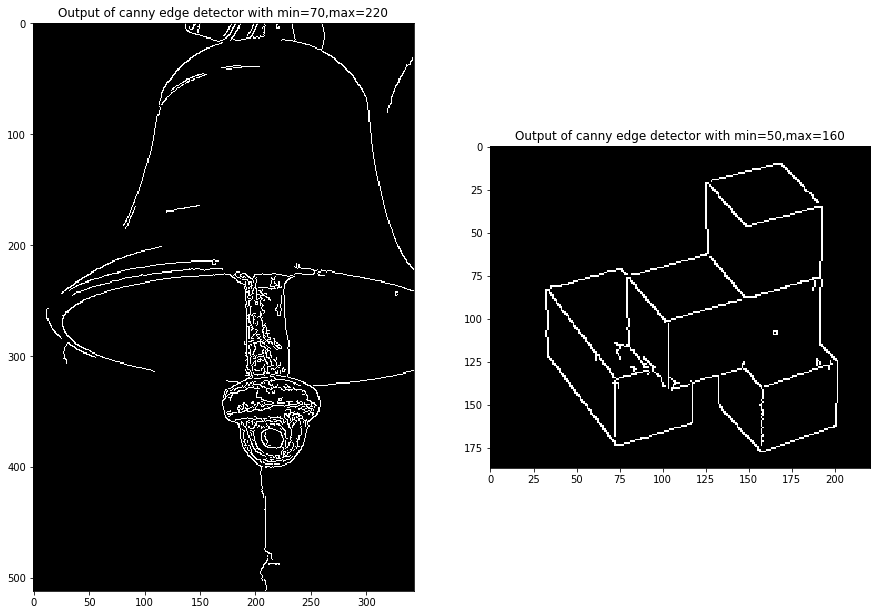

In [4]:
bell=cv2.imread('bell.jpg',0)
cubes=cv2.imread('cubes.png',0)
bell_op=cv2.Canny(bell,70,220)
cube_op=cv2.Canny(cubes,50,160)
plt.subplot(1,2,1)
plt.imshow(bell_op,cmap='gray')
plt.title("Output of canny edge detector with min=70,max=220")
plt.subplot(1,2,2)
plt.imshow(cube_op,cmap='gray')
plt.title("Output of canny edge detector with min=50,max=160")
plt.show()

In [5]:
test = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]]).astype('uint8')
kernel =  np.array([[1,1,1],[1,1,1],[1,1,1]])
print(convolve(test,kernel))
print(cv2.filter2D(test,-1,kernel))

[[14. 24. 30. 22.]
 [33. 54. 63. 45.]
 [57. 90. 99. 69.]
 [46. 72. 78. 54.]]
[[ 39  42  51  54]
 [ 51  54  63  66]
 [ 87  90  99 102]
 [ 99 102 111 114]]


## It can be thus infered from the outputs that the optimal values of min,max(intensity gradients) are as follows:
### Bell Image: Min=70,Max=220
### Cubes Image: Min=50,Max=160

## Part 2 : Testing edge detectors

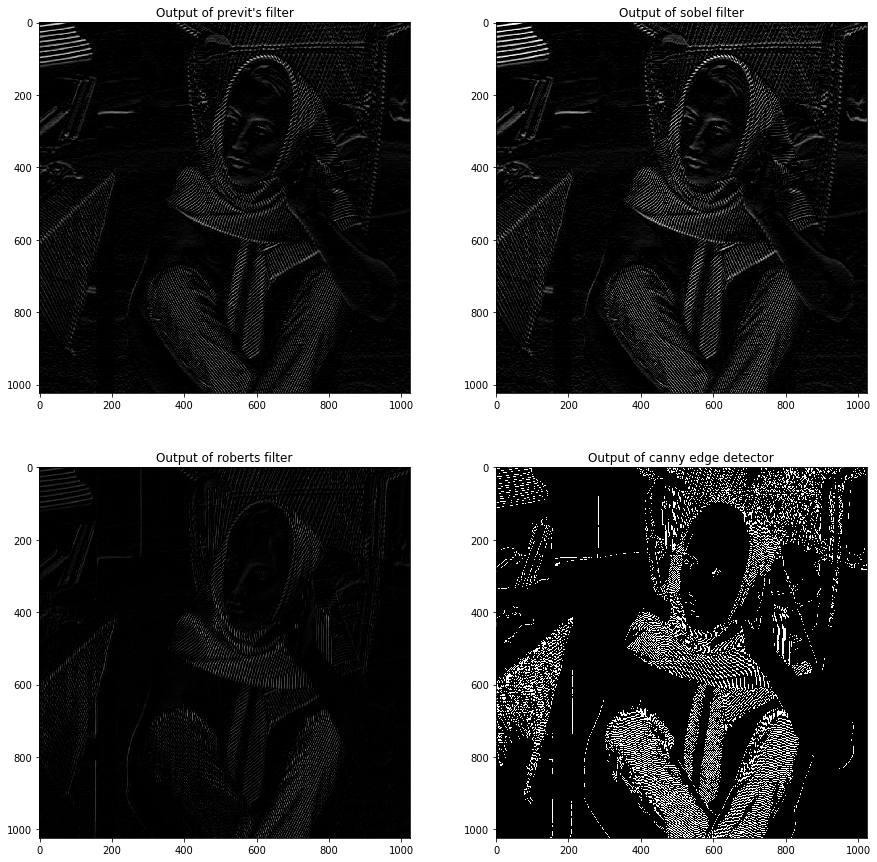

In [6]:
bar_img=cv2.imread('barbara.jpg',0)
previt = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
sobel= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
roberts = np.array([[ 0, 0, 0 ],[ 0, 1, 0 ],[ 0, 0,-1 ]])                    
previt_op=convolve(bar_img,previt)
sobel_op=convolve(bar_img,sobel)
roberts_op=convolve(bar_img,roberts)
canny_op=cv2.Canny(bar_img,70,170)
plt.subplot(2,2,1)
plt.imshow(previt_op.astype('uint8'),cmap='gray')
plt.title("Output of previt's filter")
plt.subplot(2,2,2)
plt.imshow(sobel_op.astype('uint8'),cmap='gray')
plt.title("Output of sobel filter")
plt.subplot(2,2,3)
plt.imshow(roberts_op.astype('uint8'),cmap='gray')
plt.title("Output of roberts filter")
plt.subplot(2,2,4)
plt.imshow(canny_op,cmap='gray')
plt.title("Output of canny edge detector")
plt.show()




## Part 3: Addition of Noise

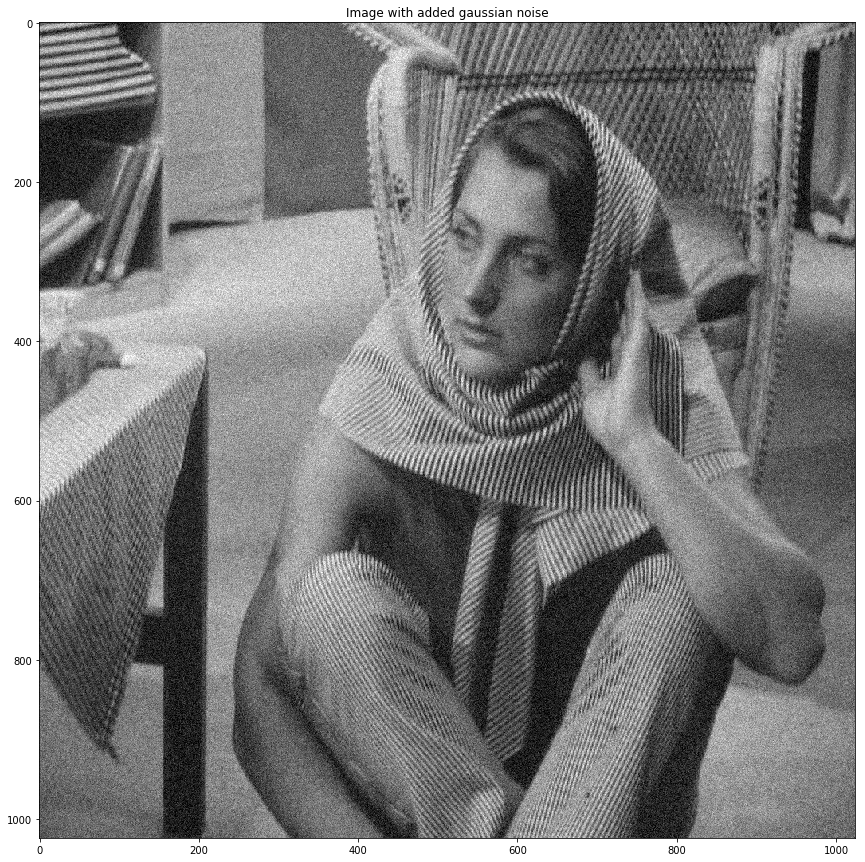

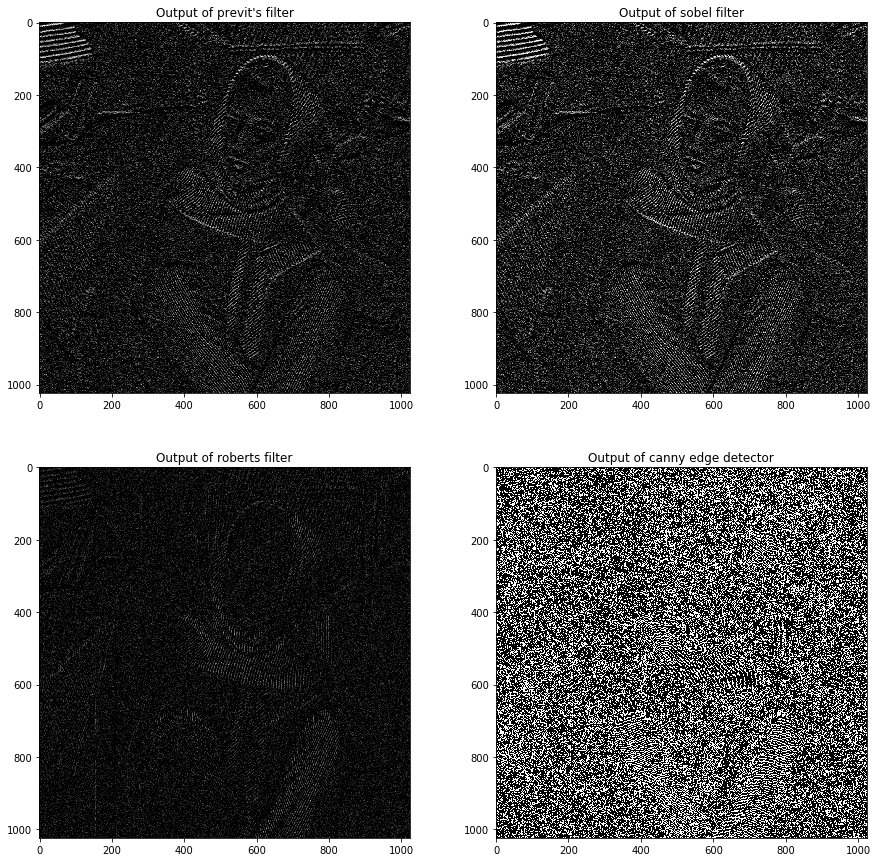

In [7]:
noise_img = random_noise(bar_img, mode='gaussian', var=0.07**2)
noise_img = (255*noise_img).astype(np.uint8)

previt_n=convolve(noise_img,previt)
sobel_n=convolve(noise_img,sobel)
roberts_n=convolve(noise_img,roberts)
canny_n=cv2.Canny(noise_img,70,170)
plt.figure(1)
plt.imshow(noise_img,cmap='gray')
plt.title("Image with added gaussian noise")
plt.figure(2)
plt.subplot(2,2,1)
plt.imshow(previt_n.astype('uint8'),cmap='gray')
plt.title("Output of previt's filter")
plt.subplot(2,2,2)
plt.imshow(sobel_n.astype('uint8'),cmap='gray')
plt.title("Output of sobel filter")
plt.subplot(2,2,3)
plt.imshow(roberts_n.astype('uint8'),cmap='gray')
plt.title("Output of roberts filter")
plt.subplot(2,2,4)
plt.imshow(canny_n,cmap='gray')
plt.title("Output of canny edge detector")
plt.show()


## It can be thus deduced that the performance of canny's edge detector is heavily degraded in presence of noise 
## Effect of noise on output:
### Canny's>Sobel>Previt>Roberts 